<a href="https://colab.research.google.com/github/Nireplag/ML_zoomcamp/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
# load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


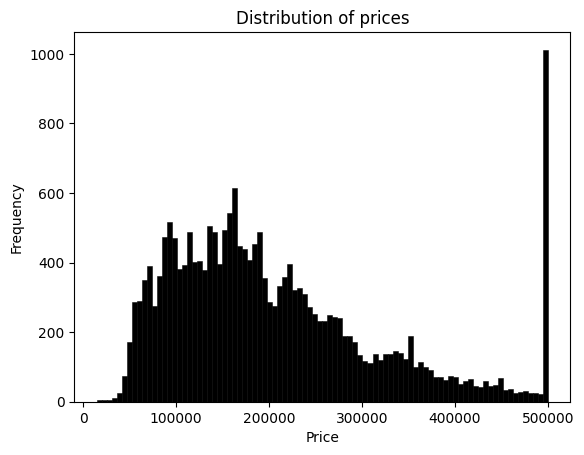

In [162]:
# plot information of median_house_value'

sns.histplot(df.median_house_value, bins=90, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [163]:
# subset dataframe with ocean_proximity is either '<1H OCEAN' or 'INLAND'

df_set1 = df[df.ocean_proximity == '<1H OCEAN']
df_set2 = df[df.ocean_proximity == 'INLAND']

df_set = pd.concat([df_set1, df_set2])
df_set.head()

# narrow down features

features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value']

df_fin = df_set[features]

df_fin.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [164]:
#validate if selection is correct
assert df_set['ocean_proximity'].nunique() == 2

print(df_set.ocean_proximity.value_counts())

assert len(df_fin.columns) == 9

<1H OCEAN    9136
INLAND       6551
Name: ocean_proximity, dtype: int64


In [76]:
# find missing values and where

df_fin.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [165]:
# median of the population

df_fin['population'].median()

1195.0

In [166]:
# prepare data split
df_fin.reset_index(inplace=True)
del df_fin['index']
df_fin.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [80]:
# split data

np.random.seed(42)

df_fin['median_house_value'] = np.log1p(df_fin['median_house_value'])

n = len(df_fin)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_fin.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

<ipython-input-80-a0cdaf2922e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['median_house_value'] = np.log1p(df_fin['median_house_value'])


In [84]:
# validating splitting
print('size of full df: ', df_fin.size)
print('size of df_train: ', df_train.size)
print('size of df_va: ', df_val.size)
print('size of df_test: ', df_test.size)

assert df_train.size + df_val.size + df_test.size == df_fin.size

size of full df:  141183
size of df_train:  84717
size of df_va:  28233
size of df_test:  28233


In [132]:
#mean of df_train
m = df_train.total_bedrooms.mean()

In [142]:
def prepare_X(df):
    df = df.fillna(0)
    #df = df.fillna(m)
    y = df['median_house_value']
    X = df.drop('median_house_value', axis=1).values
    return X, y

In [134]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [140]:
X_train, y_train = prepare_X(df_train)
X_val, y_val = prepare_X(df_val)

In [141]:
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_val.dot(w)
print(round(rmse(y_val, y_pred),2))

0.03


In [144]:
info = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r)
  y_pred = w_0 + X_val.dot(w)
  print(r, round(rmse(y_val,y_pred),2))



0 0.03
1e-06 0.03
0.0001 0.03
0.001 0.03
0.01 0.03
0.1 0.03
1 0.03
5 0.03
10 0.03


In [159]:
# question 5
pd.options.mode.chained_assignment = None

def prepare_X(df):
    df = df.fillna(0)
    y = df['median_house_value']
    X = df.drop('median_house_value', axis=1).values
    return X, y

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

validation = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  # split data

  np.random.seed(seed)

  df_fin['median_house_value'] = np.log1p(df_fin['median_house_value'])

  n = len(df_fin)

  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df_fin.iloc[idx]

  df_train = df_shuffled.iloc[:n_train]
  df_val = df_shuffled.iloc[n_train:n_train+n_val]
  df_test = df_shuffled.iloc[n_train+n_val:]

  X_train, y_train = prepare_X(df_train)
  X_val, y_val = prepare_X(df_val)

  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_val.dot(w)
  validation.append(rmse(y_val, y_pred))

print(validation)
print(round(np.std(validation), 3))

[1.4548331574193466e-05, 1.3677138790948838e-05, 1.3652191273654543e-05, 1.265473993174822e-05, 1.249277604854782e-05, 1.1489640706208541e-05, 1.0945066100646842e-05, 1.0537683144745253e-05, 1.0113560873733203e-05, 9.540973408057211e-06]
0.0


In [167]:
# question 6
pd.options.mode.chained_assignment = None

def prepare_X(df):
    df = df.fillna(0)
    y = df['median_house_value']
    X = df.drop('median_house_value', axis=1).values
    return X, y

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

  # split data

np.random.seed(9)

df_fin['median_house_value'] = np.log1p(df_fin['median_house_value'])

n = len(df_fin)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_fin.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

dt1 = pd.concat([df_train, df_val])

X_train, y_train = prepare_X(dt1)
X_test, y_test = prepare_X(df_test)

w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_test.dot(w)
print(rmse(y_test, y_pred))



0.3334490521298036
